In [40]:
# Import all the needed libraries
import pyterrier as pt
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import algos
import os
if not pt.started():
    pt.init()

In [41]:
# Load the dataset
dataset = pt.datasets.get_dataset("trec-deep-learning-passages")

In [42]:
index_ref = pt.IndexRef.of(os.getcwd() + "./passage_index/data.properties")

In [43]:
index = pt.IndexFactory.of(index_ref)

15:56:49.910 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.


In [44]:
print(index.getCollectionStatistics().toString())

Number of documents: 8841823
Number of terms: 1170682
Number of postings: 215238456
Number of fields: 1
Number of tokens: 288759529
Field names: [text]
Positions:   false



In [45]:
bm25 = pt.BatchRetrieve(index, wmodel="BM25")

In [46]:
qrels = dataset.get_qrels("test-2019")
res = algos.get_all_scores(dataset, bm25)

15:56:50.421 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


In [47]:
# pt.Experiment(
#   [bm25],
#   dataset.get_topics("test-2019"), 
#   dataset.get_qrels("test-2019"),
#   eval_metrics=["ndcg", "map", "recip_rank"], 
#   # perquery = "true",
#   # baseline=0,
#   round=3,
# )

In [9]:
eval = pt.Utils.evaluate(res, qrels, metrics = ["recip_rank"], perquery = True)

In [10]:
# only 43 queries with qrels available in the collection

In [11]:
eval

defaultdict(dict,
            {'156493': {'recip_rank': 1.0},
             '1110199': {'recip_rank': 1.0},
             '1063750': {'recip_rank': 0.3333333333333333},
             '130510': {'recip_rank': 1.0},
             '489204': {'recip_rank': 1.0},
             '573724': {'recip_rank': 0.5},
             '168216': {'recip_rank': 1.0},
             '1133167': {'recip_rank': 1.0},
             '527433': {'recip_rank': 1.0},
             '1037798': {'recip_rank': 0.3333333333333333},
             '915593': {'recip_rank': 1.0},
             '264014': {'recip_rank': 0.5},
             '1121402': {'recip_rank': 1.0},
             '962179': {'recip_rank': 0.025},
             '1117099': {'recip_rank': 1.0},
             '148538': {'recip_rank': 0.2},
             '451602': {'recip_rank': 0.3333333333333333},
             '359349': {'recip_rank': 1.0},
             '1115776': {'recip_rank': 1.0},
             '1112341': {'recip_rank': 1.0},
             '131843': {'recip_rank': 1.0},
   

In [12]:
# we need for each query id the most relevant document, and the recip procal rank and the query itself
# [[qid], [RR], [query]]

In [13]:
qids = [i for i in eval]
RR = [eval[j]['recip_rank'] for j in eval]

info = []
    
for qid in qids:
    info.append(str(res[res['qid']==str(qid)].iloc[0]["query"]))
                
print(info)

['do goldfish grow', 'what is wifi vs bluetooth', 'why did the us volunterilay enter ww1', 'definition declaratory judgment', 'right pelvic pain causes', 'what are the social determinants of health', 'does legionella pneumophila cause pneumonia', 'how is the weather in jamaica', 'types of dysarthria from cerebral palsy', 'who is robert gray', 'what types of food can you cook sous vide', 'how long is life cycle of flea', 'what can contour plowing reduce', 'when was the salvation army founded', 'what is a active margin', 'difference between rn and bsn', 'medicare s definition of mechanical ventilation', 'how to find the midsegment of a trapezoid', 'what is an aml surveillance analyst', 'what is the daily life of thai people', 'definition of a sigmet', 'cost of interior concrete flooring', 'what is the most popular food in switzerland', 'how are some sharks warm blooded', 'what is durable medical equipment consist of', 'exons definition biology', 'define visceral', 'tracheids are part of'

In [14]:
queries = pd.DataFrame({"qid":qids,"mrr":RR,"query":info})


In [15]:
queries = queries[21:]

In [16]:
queries.to_csv("Query20Part2.csv",index=False)

In [17]:
# Return the top-1 ranked document for all queries in the test set
def get_topRanked_doc(queries, index_ref):
    docs = []
    # count = 0
    for query in list(queries['query']):
        # if count == 20 : break
        # Search for the passage given the docno
        print(query)
        df = pt.BatchRetrieve(index_ref).search(query)[0:1]
        doc = (algos.search_with_doc_id(int(df['docid'])))
        docs.append(len(doc.split()))
        # count += 1
    return docs

In [18]:
docs_lengths = get_topRanked_doc(queries, index_ref)
query_lengths = [len(query.split()) for query in list(queries['query'])]

cost of interior concrete flooring
15:56:55.127 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.
what is the most popular food in switzerland
15:57:05.509 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.
how are some sharks warm blooded
15:57:15.841 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from disk (SLOW) - try index.meta.data-source=fileinmem in the index properties file. 1,9 GiB of memory would be required.
what is durable medical equipment consist of
15:57:21.834 [main] WARN org.terrier.structures.BaseCompressingMetaIndex - Structure meta reading data file directly from 

In [19]:
queries['doc_length'] = docs_lengths
queries['query_length'] = query_lengths

In [20]:
queries

,qid,mrr,query,doc_length,query_length
21,104861,1.000000,cost of interior concrete flooring,109,5
22,833860,1.000000,what is the most popular food in switzerland,90,8
23,207786,1.000000,how are some sharks warm blooded,128,6
24,1114819,1.000000,what is durable medical equipment consist of,132,7
25,183378,1.000000,exons definition biology,89,3
26,1106007,1.000000,define visceral,106,2
27,1124210,1.000000,tracheids are part of,86,4
28,490595,0.500000,rsa definition key,79,3
29,1103812,1.000000,who formed the commonwealth of independent states,112,7
30,87181,1.000000,causes of left ventricular hypertrophy,49,5


In [21]:
queries.to_csv("Query20Part2WithLengths.csv",index=False)

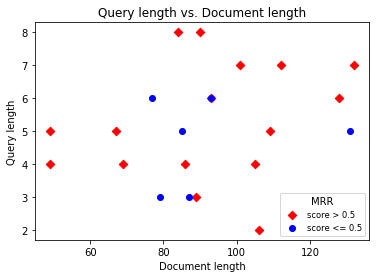

In [22]:
plt.scatter(x = queries[queries["mrr"]>0.5]["doc_length"], y = queries[queries["mrr"]>0.5]["query_length"],
           marker='D',
           color='red',
           label='score > 0.5')
plt.scatter(x =  queries[queries["mrr"]<=0.5]["doc_length"], y = queries[queries["mrr"]<=0.5]["query_length"] ,
           marker='o',
           color='blue',
           label='score <= 0.5')
plt.title('Query length vs. Document length')
plt.xlabel('Document length')
plt.ylabel('Query length')
plt.legend(title="MRR", loc=4, fontsize='small', fancybox=True)
plt.show()

In [ ]:
# We assumed that longer query, we also assumed that the MRR would be higher but that does not seem the case

In [24]:
df1 = pd.read_csv("Query20WithLengths.csv")

In [27]:
frames = [df1, queries]
result = pd.concat(frames)
result

,qid,mrr,query,doc_length,query_length
0,156493,1.000000,do goldfish grow,90,3
1,1110199,1.000000,what is wifi vs bluetooth,96,5
2,1063750,0.333333,why did the us volunterilay enter ww1,100,7
3,130510,1.000000,definition declaratory judgment,54,3
4,489204,1.000000,right pelvic pain causes,50,4
5,573724,0.500000,what are the social determinants of health,83,7
6,168216,1.000000,does legionella pneumophila cause pneumonia,92,5
7,1133167,1.000000,how is the weather in jamaica,101,6
8,527433,1.000000,types of dysarthria from cerebral palsy,37,6
9,1037798,0.333333,who is robert gray,90,4


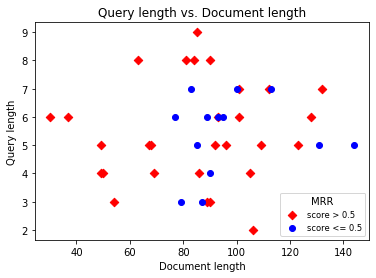

In [44]:
plt.scatter(x = result[result["mrr"]>0.5]["doc_length"], y = result[result["mrr"]>0.5]["query_length"],
           marker='D',
           color='red',
           label='score > 0.5')
plt.scatter(x =  result[result["mrr"]<=0.5]["doc_length"], y = result[result["mrr"]<=0.5]["query_length"] ,
           marker='o',
           color='blue',
           label='score <= 0.5')
plt.title('Query length vs. Document length')
plt.xlabel('Document length')
plt.ylabel('Query length')
plt.legend(title="MRR", loc=4, fontsize='small', fancybox=True)
plt.savefig('QueryLengthVSDocumentLength.svg')

In [29]:
result.to_csv("QueriesAllLengths.csv",index=False)

In [45]:
result = pd.read_csv("QueriesAllLengths.csv")

In [50]:
score = []
for qid in list(result["qid"]):
    df1 = res[(res["qid"]==str(qid)) & (res["rank"]==0)]
    score.append(float(df1["score"]))
    #info.append(str(res[res['qid']==str(qid)].iloc[0]["query"]))
result["score"] = score

In [52]:
result.to_csv("QueriesAllLengthScore.csv", index=False)

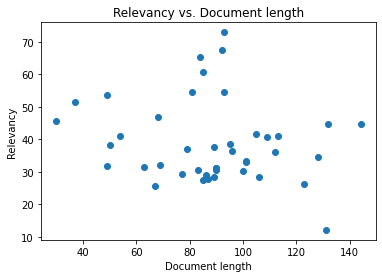

In [55]:
plt.scatter(result['doc_length'], result['score'])
plt.title('Relevancy vs. Document length')
plt.xlabel('Document length')
plt.ylabel('Relevancy')
# plt.legend(title="MRR", loc=4, fontsize='small', fancybox=True)
plt.savefig('DocumentVsRelvancy.svg')
plt.show()

list1: Series([], Name: score, dtype: float64)

list2: 25    28.322221
Name: score, dtype: float64
Max query len =  9


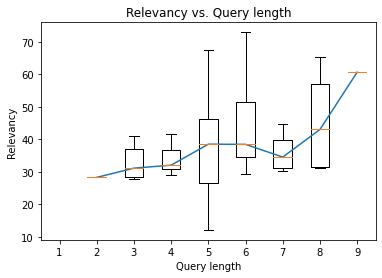

In [78]:
import numpy as np
import statistics

list1 = result[result['query_length']==1]['score']
print("list1:", list1)
list2 = result[result['query_length']==2]['score']
print("\nlist2:",list2)
list3 = result[result['query_length']==3]['score']
list4 = result[result['query_length']==4]['score']
list5 = result[result['query_length']==5]['score']
list6 = result[result['query_length']==6]['score']
list7 = result[result['query_length']==7]['score']
list8 = result[result['query_length']==8]['score']
list9 = result[result['query_length']==9]['score']

print("Max query len = ",max(result['query_length']))
plt.boxplot([list1,list2,list3,list4,list5,list6,list7,list8,list9])

plt.plot(range(2,10),
         [statistics.median(list2),statistics.median(list3),statistics.median(list4),statistics.median(list5),statistics.median(list6),statistics.median(list7),statistics.median(list8),statistics.median(list9)])

plt.title('Relevancy vs. Query length')
plt.xlabel('Query length')
plt.ylabel('Relevancy')
# plt.legend(title="MRR", loc=4, fontsize='small', fancybox=True)
plt.savefig('QueryVsRelvancy.svg')
plt.show()

In [86]:
# Combine all documents from the test set, and make a dict for each word in the entire corpus with it's frequency
# Take the top-k most commong words (stop-wards are removed from it) and take the top-k most relevant (highest)
# scoring documents and plot these in the heatmap. Also for each term, we should calculate the idf in these according
# documents.

for kv in index.getLexicon():
    print(kv.getKey())

0
00
000
0001
0001a
0001aa
0001b
0001btc
0001g
0001m
0001mm
0001note
0001u
0002
0002xx
0003
0003mhz
0003mm
0004
0005
0006
0007
0007j
0007mm
0007u
0008
0009
0009hr
000a
000account
000acr
000age
000aic
000alabama
000all
000amanufactur
000american
000and
000ariari
000arizona
000at
000atm
000au
000averag
000b
000b0
000baht
000bc
000bce
000beach
000becaus
000bhp
000bn
000boe
000bond
000bp
000bpd
000bpm
000brand
000btu
000burni
000busi
000byte
000c
000cad
000cc
000cd
000cdn
000cf
000cfm
000cfu
000ch
000cheroke
000cm
000cm3
000combin
000contribut
000coordin
000cr
000cu
000cubicfeetperhour
000cubit
000czk
000d
000da
000dalton
000date
000devonport
000differ
000dl
000dollar
000domain
000downpay
000due
000dure
000dwt
000e
000each
000edupress
000employe
000er
000ese
000estim
000euro
000extens
000f
000feder
000feet
000ff
000florida
000for
000fpm
000french
000ft
000ft2
000ft3
000g
000g1
000gallon
000gb
000gca
000gene
000gn
000good
000gp
000grade
000graduat
000gram
000gross
000guarante
000gw
000gwh
0

0349
0349m
034e
034g
034km
034mol
034th
034x
035
0350
0351
0351infantri
0352
0353
0354
0355
0356
0357
0358
0359
035ft
035g
035inth
035kg
035mg
035th
035x
036
0360
0361
0362
0363
0364
0365
0366
0367
0368
0369
036academ
036b
036bhp
036hakeem
036m
037
0370
0371
0372
0373
0374
0375
0375mg
0376
0377
0378
0379
037m
037th
037x2
038
0380
0381
0382
0383
0383dadf
0384
0385
0386
0386phone
0387
0388
0389
0389tel
038m
038mm
038room
038th
038total
038x
039
0390
0391
0392
0393
0394
0394info
0395
0396
0397
0398
0399
0399e
0399t
039c
039g
039th
03a
03a3
03a4
03a9
03am
03and
03august
03b
03b2
03b3
03b4
03b8
03bc
03bk0zz
03bo
03c
03c0
03c4
03ck0zz
03cm
03d
03d0
03d1
03d1ff
03dm
03dop
03e
03e2
03e23
03e3
03eb
03ec
03f
03fac
03ff
03ft
03g
03gb
03h
03h31
03hizzo
03hydrocarbon
03i
03j0
03jnr2
03join
03l
03m
03m3
03mb
03mg
03mi
03million
03min
03ml
03mm
03nov
03oct
03oh
03oz
03p
03p50
03p56
03p60
03p8
03per
03pholgfax
03pm
03ppm
03ps2
03pw
03q
03rd
03retir
03rev
03rg20
03sc
03sep15
03sepold
03slurri
03subcomm

0b
0b000
0b05
0b0ng
0b1
0b101
0b111
0b15
0b2
0b200
0b21xfz
0b2h
0b3
0b4b
0b5c
0b5w
0b6
0b6c0bc7
0b8
0b8c
0b9o
0bama
0base
0bbie
0bc
0be
0befor
0best
0bf
0bh
0bhp
0bii
0bj88zz
0bopi
0bsa
0bstage
0bstet
0buffer
0bv5gi
0bxmc
0by
0byte
0bzihh09l
0c
0c0
0c07
0c3
0c3h1jm
0c5
0c7
0c9f
0calc
0cancel
0cc
0cc6
0ccc45cc
0cd
0cdgq6aewaa
0cdti
0cean
0celo7
0ch
0chekmynamemc0
0chocol
0cholesterol
0chrome
0cm
0cmawai
0comment
0contractor
0cool
0corollari
0cpl
0cr15al5
0creat
0creativ
0crm1
0cs0l
0ct
0ctober
0ctw
0cu
0custom
0d
0d000nen
0d010
0d1
0d16
0d2cc1e9
0d35e1
0d4
0d4b
0d53
0d59
0d6e1
0d7
0d878zz
0dai
0data
0db
0db8
0dbd
0dbi
0dbm
0dbvu
0dctd
0deg
0degc
0degre
0delta
0deu
0df4
0di2
0dislik
0divid
0dnf
0document
0dpi
0drt
0dt
0dtr
0dv
0dw
0dy
0dyssei
0e
0e01
0e1
0e126
0e2
0e3
0e4c92
0e54
0e5b
0e6
0e6ac0cc
0e7
0e9a
0e9bf1a8
0e9hllywiq
0ed
0ee
0ef3
0ef47acd
0ei
0em
0eta
0etwh
0eu
0event
0f
0f0
0f07
0f099cae
0f0f0f
0f1d
0f3
0f4d92
0f58
0f7d0zz
0f8b15aktd
0faai
0facebook
0fazf6tsd2
0fca
0fd
0feder
0

1052cc
1052he
1052kg
1053
1053in
1053polici
1053text
1054
1054mm
1054why
1055
1055g
1055t
1055ufwi
1056
1056d
1057
1057g
1057l
1058
1059
105a
105ad
105ah
105an
105b
105bhp
105bn
105btabl
105c
105cal
105cm
105custom
105d
105db
105degc
105e
105epc
105f
105ft
105g
105gr
105gsm
105h
105ha
105hour
105hp
105i
105in
105k
105k2
105kb
105kcal
105kda
105kg
105kj
105km
105knot
105kohm
105kva
105lb
105m
105mbp
105mg
105mi
105mile
105million
105min
105ml
105mm
105mmhg
105mpa
105mpg
105mph
105mx
105neillsvil
105oc
105of
105p
105pascal
105px
105r
105repli
105rf
105section
105th
105the
105uc9
105ur
105wpm
105y
105year
106
1060
1060gm
1060l
1060mg
1060n
1060traffic
1060welcom
1061
1061c
1062
1062a
1063
1063b
1063cc
1064
1064nm
1065
1065km
1065mm
1065qd
1065x
1066
1066ad
1066cm
1066ish
1066mh
1066mhz
1066th
1066william
1067
1067mm
1068
1068arrow
1068e
1068mg
1069
106a
106b
106billion
106c
106cd
106ci
106cindi
106cm
106d
106db
106f
106ff
106for
106g
106gr
106ha
106hp
106k
106kb
106kg
106km
106kw
106last


KeyboardInterrupt: 

In [83]:
index.getLexicon()["chemic"].getFrequency()

124544

In [85]:
list(index.getLexicon())

KeyboardInterrupt: 

In [91]:
index.getLexicon()

<org.terrier.structures.Lexicon at 0x28498da49f0 jclass=org/terrier/structures/Lexicon jself=<LocalRef obj=0x-1271fe20 at 0x2849b0c1c10>>

In [92]:
index.getMetaIndex()

<org.terrier.structures.MetaIndex at 0x2849af96810 jclass=org/terrier/structures/MetaIndex jself=<LocalRef obj=0x-1271fd70 at 0x2849b0c1850>>

In [94]:
files = open("./collection.tsv", "r", encoding="utf8")

collection = ""
    
for file in tqdm(files):
    _, passage = file.split("\t")
    collection += " " + passage
    
files.close()

1436147it [5:16:38, 75.59it/s] 


KeyboardInterrupt: 

In [61]:
#def given qrels dataset, return if qid, docid exists in ranked model
def check_qrel_queries():
    queries_df = dataset.get_topicsqrels("train")[0]
    qrels_df = dataset.get_topicsqrels("train")[1]
    
    docs_qrels = []

    for qid in list(queries_df["qid"]):
        # One particular query
        qrels_queries = qrels_df[qrels_df["qid"] == qid]
        
        if len(qrels_queries) == 0:
            # print("qid:" + str(qid) + "does not exist")
            continue
            
        docNo = qrels_queries.iloc[0]["docno"]        
        query = queries_df[queries_df["qid"] == qid].iloc[0]["query"]

        # Returns the top 1000 relevant documents for this query (that has as qrel)
        result = bm25.search(query)
        
        docs_qrels.append(check_rel_doc_present(docNo,result, qid))
    
    return docs_qrels

#given a docid, search if the doc id exists in result.
def check_rel_doc_present(docid, result, qid):

    # Hypothesis that this if statement is always true
    if docid in list(result["docno"]):
        R = result[result["docno"]==docid]
        rank = R.iloc[0]["rank"]
        score = R.iloc[0]["score"]
        doc_id = R.iloc[0]["docid"]
        # print("rank : ", rank)
        # print("score: ", score)
        # print("docid : ", doc_id)
        return {"rank":rank, "docid": doc_id, "score": score, "qid" : qid}
    else:
        # Then we have document that were not found in the top-1000 ranked documents despite 
        # the query they belong to had a qrel provided
        
        # print("not found")
        return {"rank":-1, "docid": docid, "score": -1, "qid" : qid}

In [62]:
temp = check_qrel_queries()

16:09:13.082 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8
16:09:20.749 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


KeyboardInterrupt: 

In [65]:
dataset.get_topicsqrels("train")[0].iloc[0]

20:10:33.604 [main] WARN org.terrier.applications.batchquerying.TRECQuery - trec.encoding is not set; resorting to platform default (windows-1252). Retrieval may be platform dependent. Recommend trec.encoding=UTF-8


qid              121352
query    define extreme
Name: 0, dtype: object

In [ ]:
# Model built with all the queries (regardless of they have qrels), and evaluation is where we are using 
# the qrels to determine the relevancy (intstrument to give the final score)

# Given the query, with its qrel, these documents were not retrieved.
# So either the query is wrong or the less likely case is that the qrel is wrong
# Assuming the query is wrong, possibilities that causes the system to malfunctio the system is because...
# - Perhaps the document is not classified as relevant because either the query or the passage using synomyms 

In [ ]:
# ERROR ANALYSIS - BM25 - ALL
# - Need to determine for which queries (with qrel) the document is not retrived?
#   - And provided reasons for this
# - Least performing queries (with qrels), provide the best performing documents, what can we say about them?
# - (see Google docs for extra is time allows)
# IMPROVEMENTS - BM25 (ask the teacher if we need to do error analysis on these as well? - nice to have)
# - Julian : Query expansion 
# - Varnika + Monica : Prior probabilities
# - All : SIGNIFICANCE TESTING BETWEEN BM25 AND IMPROVEMENTS (see Pyterrier)
#---------------------------------------------------------------------------------------------------------------------
# Monica : INDEXING L2R
# - WIP
# Monica : IMPLEMENTING BASELINE (L2R)
# - WIP
# (maybe verify with the teacher just to be sure that this is everything that needs to be done)
#---------------------------------------------------------------------------------------------------------------------
# REPORT (All)
# - Update the report according to the feedback we receive from the teacher/TA
# - Extend the report where needed
#---------------------------------------------------------------------------------------------------------------------
# STUDY!
# - Queations about the prodcut, reason why we did something instead of something else
# - Or ask questions about theory of the course, and why we choose to use BM25 instead of other model
#---------------------------------------------------------------------------------------------------------------------
# (DONE)Julian : send email Claudi + GitHub
# - Should do the error analysis also on the improvements similar to what we had for the baseline BM25?
# - Do the images count towards the page limit?
#---------------------------------------------------------------------------------------------------------------------
# Next meeting either Thursday or Friday